# Explore MovieLens 25M dataset

A description of the dataset can be found in the README.txt inside the directory where the raw data is stored.

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [3]:
# Ratings
ratings = pd.read_csv('../raw_data/ml-25m/ratings.csv')
print(ratings.shape)
print(ratings.isna().sum())
ratings.head()

(25000095, 4)
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
# Movies
movies = pd.read_csv('../raw_data/ml-25m/movies.csv')
print(movies.shape)
print(movies.isna().sum())
movies.head()

(62423, 3)
movieId    0
title      0
genres     0
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Tags
tags = pd.read_csv('../raw_data/ml-25m/tags.csv')
print(tags.shape)
print(tags.isna().sum())
tags.head()

# 16 missing tags

(1093360, 4)
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [6]:
# # Genome scores 2014
# path = r"C:\Users\Usuario\Documents\tag-genome\tag_relevance.dat"
# genome_scores_2014 = pd.read_csv(path, sep="\t", header=None)
# genome_scores_2014.columns = ["movie_id", "tag_id", "relevance"]
# print(genome_scores_2014.shape)
# print(genome_scores_2014.isna().sum())
# genome_scores_2014.head()

In [7]:
# Genome tags
genome_tags = pd.read_csv('../raw_data/ml-25m/genome-tags.csv')
print(genome_tags.shape)
print(genome_tags.isna().sum())
genome_tags.head()

(1128, 2)
tagId    0
tag      0
dtype: int64


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [8]:
# Genome scores
genome_scores = pd.read_csv('../raw_data/ml-25m/genome-scores.csv')
print(genome_scores.shape)
print(genome_scores.isna().sum())
genome_scores.head()

(15584448, 3)
movieId      0
tagId        0
relevance    0
dtype: int64


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [9]:
# # Links
# links = pd.read_csv('../raw_data/ml-25m/links.csv')
# print(links.shape)
# print(links.isna().sum())
# links.head()

## Pre-processing

In [10]:
# Timestamps for ratings
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
ratings['year_month'] = ratings['timestamp'].dt.to_period('M')

# ratings['hour'] = ratings['timestamp'].dt.hour
# ratings['minute'] = ratings['timestamp'].dt.minute
# ratings['second'] = ratings['timestamp'].dt.second

# ratings['dayofweek'] = ratings['timestamp'].dt.dayofweek
# ratings['dayofyear'] = ratings['timestamp'].dt.dayofyear

In [11]:
# Movie year
movies['premier_year'] = movies['title'].str.extract(r'\((\d{4})\)')

print("Amount of movies with missing premier year: ", movies['premier_year'].isna().sum())
# As a percentage of the total amount of movies
print("Percentage of movies with missing premier year: ", movies['premier_year'].isna().sum() / movies.shape[0] * 100)

movies.head()

Amount of movies with missing premier year:  410
Percentage of movies with missing premier year:  0.6568091889207504


,movieId,title,genres,premier_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
# Movie genres
movies['genre_list'] = movies['genres'].str.split('|')

# When genre is '(no genres listed)', we set it to an empty list
movies['genre_list'] = movies['genre_list'].apply(lambda x: [] if x == ['(no genres listed)'] else x)

# Count number of genres per movie
movies['num_genres'] = movies['genre_list'].str.len()

# Create dummies
movies_genres = movies['genre_list'].explode().str.get_dummies().groupby(level=0).sum()
movies = movies.join(movies_genres)
del movies_genres

movies.head()

,movieId,title,genres,premier_year,genre_list,num_genres,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]",2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]",3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# See cases where premier year is nan
movies[movies['premier_year'].isna()].head()

,movieId,title,genres,premier_year,genre_list,num_genres,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
15036,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN,"[Action, Drama, Sci-Fi, Thriller]",4,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
25387,123619,Terrible Joe Moran,(no genres listed),NaN,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26284,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaN,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26309,125632,In Our Garden,(no genres listed),NaN,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26392,125958,Stephen Fry In America - New World,(no genres listed),NaN,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Check equivalence between genome tags and dataset from 2014

In [14]:
# # Load genome tags 2014
# path = r"C:\Users\Usuario\Documents\tag-genome\tags.dat"
# genome_tags_2014 = pd.read_csv(path, sep="\t", header=None)
# genome_tags_2014.columns = ["tag_id", "tag", "TagPopularity"]
# print(genome_tags_2014.shape)
# print(genome_tags_2014.isna().sum())
# genome_tags_2014.head()

In [ ]:
# print(print(genome_tags_2014.shape))
# genome_tags.head()

NameError: name 'genome_tags_2014' is not defined

In [ ]:
# def compare_dataframes_show_diff(df1, df2):
#     # Step 1: Check shape
#     if df1.shape != df2.shape:
#         print("DataFrames have different shapes:", df1.shape, df2.shape)
#         return

#     # Step 2: Convert to numpy arrays (ignore column names)
#     array1 = df1.to_numpy()
#     array2 = df2.to_numpy()

#     # Step 3: Compare rows
#     row_equal = np.all(array1 == array2, axis=1)

#     # Step 4: Identify indices where rows differ
#     differing_rows = np.where(~row_equal)[0]

#     if len(differing_rows) == 0:
#         print("DataFrames are identical (values).")
#     else:
#         print(f"DataFrames differ in {len(differing_rows)} rows:")
#         for idx in differing_rows:
#             if idx>5:
#                 print("Reached maximum number of differing rows to show.")
#                 break
#             print(f"\nRow {idx}:")
#             print("df1:", array1[idx])
#             print("df2:", array2[idx])
            

# # Usage
# compare_dataframes_show_diff(genome_tags_2014[['tag_id', 'tag']], genome_tags)

DataFrames differ in 1128 rows:

Row 0:
df1: [0 '007']
df2: [1 '007']

Row 1:
df1: [1 '007 (series)']
df2: [2 '007 (series)']

Row 2:
df1: [2 '18th century']
df2: [3 '18th century']

Row 3:
df1: [3 '1920s']
df2: [4 '1920s']

Row 4:
df1: [4 '1930s']
df2: [5 '1930s']

Row 5:
df1: [5 '1950s']
df2: [6 '1950s']
Reached maximum number of differing rows to show.


In [ ]:
# # Sum 1 to tag_id to match with genome_scores_2014
# genome_tags_2014['tag_id'] = genome_tags_2014['tag_id'] + 1
# compare_dataframes_show_diff(genome_tags_2014[['tag_id', 'tag']], genome_tags)

DataFrames are identical (values).


In [ ]:
# # Load genome tag scores 2014
# path = r"C:\Users\Usuario\Documents\tag-genome\tag_relevance.dat"
# genome_scores_2014 = pd.read_csv(path, sep="\t", header=None)
# genome_scores_2014.columns = ["MovieID", "TagID", "Relevance"]
# print(genome_scores_2014.shape)
# print(genome_scores_2014.isna().sum())

# # Sum 1 to tag_id to match with genome_scores_2014
# genome_scores_2014['TagID'] = genome_scores_2014['TagID'] + 1

# genome_scores_2014.head()

(10979952, 3)
MovieID      0
TagID        0
Relevance    0
dtype: int64


,MovieID,TagID,Relevance
0,1,1,0.032
1,1,2,0.035
2,1,3,0.070
3,1,4,0.114
4,1,5,0.105


In [ ]:
# print(genome_scores.shape)
# genome_scores.head()

(15584448, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
# # Take a random movie ID
# random_movie_id = genome_scores.movieId.sample(1).iloc[0]

# # Subset genome_scores_2014 for the random movie ID
# random_movie_scores_2014 = genome_scores_2014[genome_scores_2014['MovieID'] == random_movie_id]

# # Subset genome_scores for the random movie ID
# random_movie_scores = genome_scores[genome_scores['movieId'] == random_movie_id]
# print("Random movie ID: ", random_movie_id)

# # Round the third column of both DataFrames to 3 decimal places
# random_movie_scores_2014.iloc[:, 2] = random_movie_scores_2014.iloc[:, 2].round(3)
# random_movie_scores.iloc[:, 2] = random_movie_scores.iloc[:, 2].round(3)

# # Compare the two DataFrames
# compare_dataframes_show_diff(random_movie_scores_2014, random_movie_scores)

Random movie ID:  7833
DataFrames differ in 1087 rows:

Row 0:
df1: [7.833e+03 1.000e+00 5.800e-02]
df2: [7.833e+03 1.000e+00 3.700e-02]

Row 1:
df1: [7.833e+03 2.000e+00 9.300e-02]
df2: [7.833e+03 2.000e+00 4.200e-02]

Row 2:
df1: [7.833e+03 3.000e+00 3.000e-02]
df2: [7.833e+03 3.000e+00 7.300e-02]

Row 3:
df1: [7.833e+03 4.000e+00 4.800e-02]
df2: [7.833e+03 4.000e+00 1.200e-01]

Row 4:
df1: [7.833e+03 5.000e+00 1.760e-01]
df2: [7.833e+03 5.000e+00 3.780e-01]

Row 5:
df1: [7.833e+03 6.000e+00 1.120e-01]
df2: [7.833e+03 6.000e+00 2.760e-01]
Reached maximum number of differing rows to show.


In [ ]:
# # How many movie IDs from movies are in genome_scores_2014?
# genome_scores_2014_movie_ids = genome_scores_2014['MovieID'].unique()
# movies_movie_ids = movies['movieId'].unique()
# print("Number of unique movie IDs in genome_scores_2014: ", len(genome_scores_2014_movie_ids))
# print("Number of unique movie IDs in movies: ", len(movies_movie_ids))
# print("Number of movie IDs in movies that do not exist in genome_scores_2014: ", len(set(movies_movie_ids) - set(genome_scores_2014_movie_ids)))

Number of unique movie IDs in genome_scores_2014:  9734
Number of unique movie IDs in movies:  62423
Number of movie IDs in movies that do not exist in genome_scores_2014:  52838


In [ ]:
9734/62423

0.15593611329157522

In [ ]:
# # Movies in movies whose IDs are not in genome_scores_2014
# missing_movies = movies[~movies['movieId'].isin(genome_scores_2014_movie_ids)]
# print(dict(missing_movies.premier_year.value_counts()))
# missing_movies.sample(5)

{'2015': np.int64(2513), '2016': np.int64(2488), '2014': np.int64(2405), '2017': np.int64(2374), '2013': np.int64(2061), '2018': np.int64(2034), '2012': np.int64(1823), '2011': np.int64(1627), '2010': np.int64(1455), '2009': np.int64(1436), '2008': np.int64(1345), '2007': np.int64(1203), '2006': np.int64(1146), '2019': np.int64(994), '2005': np.int64(982), '2004': np.int64(880), '2003': np.int64(733), '2002': np.int64(699), '2001': np.int64(658), '2000': np.int64(608), '1999': np.int64(523), '1998': np.int64(498), '1972': np.int64(491), '1997': np.int64(476), '1971': np.int64(475), '1974': np.int64(457), '1973': np.int64(454), '1988': np.int64(441), '1970': np.int64(436), '1976': np.int64(430), '1989': np.int64(422), '1979': np.int64(418), '1987': np.int64(416), '1968': np.int64(408), '1995': np.int64(404), '1969': np.int64(402), '1977': np.int64(400), '1975': np.int64(394), '1978': np.int64(388), '1992': np.int64(385), '1996': np.int64(384), '1985': np.int64(381), '1994': np.int64(375

,movieId,title,genres,premier_year,genre_list,num_genres,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
19199,99941,Double Indemnity (1973),Crime|Drama|Thriller,1973,"[Crime, Drama, Thriller]",3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36501,150377,Great Expectations (1999),Drama|Romance,1999,"[Drama, Romance]",2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30085,135444,A.C.A.B.: All Cops Are Bastards (2012),Action|Crime|Drama,2012,"[Action, Crime, Drama]",3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43274,165661,The Piper (2015),Fantasy|Horror,2015,"[Fantasy, Horror]",2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37160,152033,The Cinema Snob Movie (2012),Comedy,2012,[Comedy],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Movies in movies whose IDs are in genome_scores_2014
# present_movies = movies[movies['movieId'].isin(genome_scores_2014_movie_ids)]
# print(present_movies.premier_year.unique())
# print(dict(present_movies.premier_year.value_counts()))
# present_movies.sample(5)

['1995' '1994' '1996' '1976' '1992' '1967' '1993' '1964' '1977' '1965'
 '1982' '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1973' '1970'
 '1960' '1955' '1959' '1968' '1988' '1975' '1948' '1950' '1987' '1997'
 '1956' '1958' '1972' '1943' '1952' '1951' '1957' '1961' '1954' '1934'
 '1944' '1963' '1942' '1941' '1953' '1939' '1947' '1946' '1945' '1938'
 '1935' '1936' '1926' '1949' '1932' '1985' '1974' '1971' '1979' '1986'
 '1980' '1978' '1966' '1962' '1983' '1984' '1933' '1931' '1922' '1998'
 '1927' '1929' '1930' '1928' '1999' '2000' '1925' '1919' '1923' '1918'
 '1921' '2001' '1924' '2002' '2003' '1920' '1915' '2004' '1916' '1917'
 '2005' '2006' '1902' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014']
{'2002': np.int64(325), '2000': np.int64(321), '1996': np.int64(319), '1997': np.int64(316), '2001': np.int64(313), '1998': np.int64(305), '1995': np.int64(301), '2006': np.int64(300), '2003': np.int64(295), '2007': np.int64(295), '2004': np.int64(292), '1999': np.int64(289), '200

,movieId,title,genres,premier_year,genre_list,num_genres,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4999,5105,Don't Look Now (1973),Drama|Horror|Thriller,1973,"[Drama, Horror, Thriller]",3,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8703,26270,Lone Wolf and Cub: Baby Cart at the River Styx...,Action|Adventure,1972,"[Action, Adventure]",2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,1880,Lawn Dogs (1997),Drama,1997,[Drama],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4789,4895,"Wash, The (2001)",Comedy,2001,[Comedy],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
488,493,Menace II Society (1993),Action|Crime|Drama,1993,"[Action, Crime, Drama]",3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Descriptive

In [16]:
# Amount of unique users and movies
print('Unique users:', ratings['userId'].nunique())
print('Unique movies:', ratings['movieId'].nunique())

Unique users: 162541
Unique movies: 59047


Number of ratings of 4.0 or higher:  12452811
Number of ratings of 3.5 or lower:  12547284
Distribution of ratings: rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64


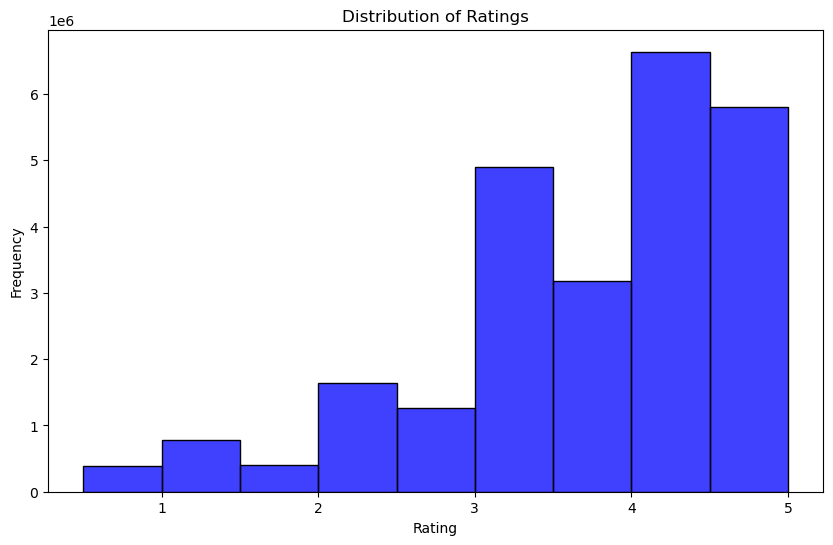

In [17]:
# Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



print("Number of ratings of 4.0 or higher: ", len(ratings[ratings['rating'] >= 4.0]))
print("Number of ratings of 3.5 or lower: ", len(ratings[ratings['rating'] <= 3.5]))

print("Distribution of ratings:", ratings['rating'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], binwidth=0.5, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

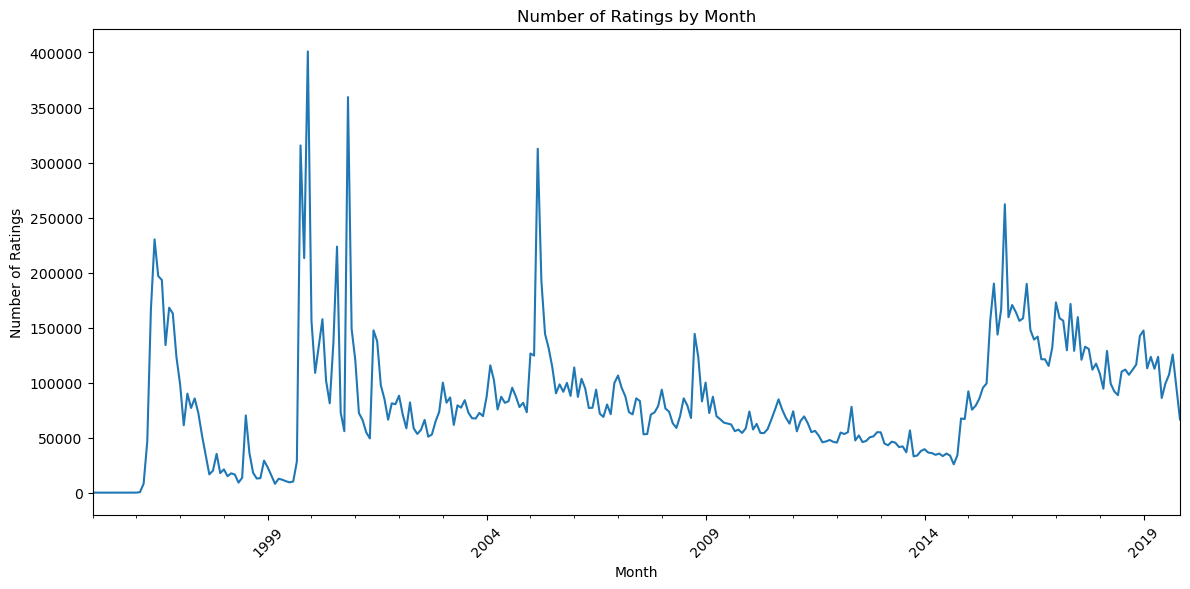

In [18]:
# Showh how the amount of ratings varies across months
ratings_by_month = ratings.groupby('year_month').size()

# 4. Plot
plt.figure(figsize=(12, 6))
ratings_by_month.plot(kind='line')

plt.title('Number of Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
# Print first and last year of ratings
print("First year of ratings:", ratings['year'].min())
print("Last year of ratings:", ratings['year'].max())

#  How many ratings were done before X?
# Define the list of cutoff years
cutoff_years = [2005, 2010, 2015, 2016, 2017, 2018]

# Loop through the years
for year in cutoff_years:
    ratings_before_year = ratings[ratings['year'] < year]
    count = len(ratings_before_year)
    percentage = round((count / len(ratings)) * 100)
    print(f"Number of ratings before {year}: {count} ({percentage}%)")


First year of ratings: 1995
Last year of ratings: 2019
Number of ratings before 2005: 8926690 (36%)
Number of ratings before 2010: 14338258 (57%)
Number of ratings before 2015: 17436354 (70%)
Number of ratings before 2016: 19041325 (76%)
Number of ratings before 2017: 20798765 (83%)
Number of ratings before 2018: 22488700 (90%)


In [20]:
# How many ratings before and after March 2014?
cutoff_date = pd.to_datetime('2014-03-31')
ratings_before_cutoff = ratings[ratings['timestamp'] <= cutoff_date]
ratings_after_cutoff = ratings[ratings['timestamp'] > cutoff_date]
count_before = len(ratings_before_cutoff)
count_after = len(ratings_after_cutoff)
percentage_before = round((count_before / len(ratings)) * 100)
percentage_after = round((count_after / len(ratings)) * 100)
print(f"Number of ratings before March 2014: {count_before} ({percentage_before}%)")
print(f"Number of ratings after March 2014: {count_after} ({percentage_after}%)")
del ratings_before_cutoff, ratings_after_cutoff

Number of ratings before March 2014: 17068950 (68%)
Number of ratings after March 2014: 7931145 (32%)


In [21]:
# How many ratings between April 2014 and January 2017?
cutoff_date_start = pd.to_datetime('2014-04-01')
cutoff_date_end = pd.to_datetime('2017-01-31')
ratings_between_cutoff = ratings[(ratings['timestamp'] > cutoff_date_start) & (ratings['timestamp'] <= cutoff_date_end)]
count_between = len(ratings_between_cutoff)
percentage_between = round((count_between / len(ratings)) * 100)
print(f"Number of ratings between April 2014 and January 2017: {count_between} ({percentage_between}%)")
print("As a percentage of ratings before March 2014: ", round((count_between / count_before) * 100, 2), "%")
del ratings_between_cutoff

Number of ratings between April 2014 and January 2017: 3897979 (16%)
As a percentage of ratings before March 2014:  22.84 %


In [22]:
# Convert timestamp to datetime
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Group by user and get first and last datetime
user_time_range = ratings.groupby('userId')['datetime'].agg(['min', 'max'])

# Calculate timedelta
user_time_range['time_diff'] = user_time_range['max'] - user_time_range['min']

# Convert timedelta to days and round to nearest integer
user_time_range['time_diff_days'] = user_time_range['time_diff'].dt.total_seconds() / (60 * 60 * 24)
user_time_range['time_diff_days'] = user_time_range['time_diff_days'].round().astype(int)

# Descriptive statistics
print("Descriptive statistics (days):")
print(user_time_range['time_diff_days'].describe())

# Optional: If you want to see the actual DataFrame
user_time_range.head()

Descriptive statistics (days):
count    162541.000000
mean        221.391698
std         716.550386
min           0.000000
25%           0.000000
50%           0.000000
75%          40.000000
max        8101.000000
Name: time_diff_days, dtype: float64


,min,max,time_diff,time_diff_days
userId,,,,
1,2006-05-17 12:14:13,2006-05-17 15:34:15,0 days 03:20:02,0
2,2006-03-03 19:51:49,2006-03-03 20:33:28,0 days 00:41:39,0
3,2015-08-13 13:23:19,2019-08-18 01:31:23,1465 days 12:08:04,1466
4,2019-11-16 20:44:51,2019-11-19 20:25:01,2 days 23:40:10,3
5,1996-04-29 13:55:55,1997-03-17 19:53:41,322 days 05:57:46,322


In [23]:
user_time_range['time_diff_days'].value_counts()

time_diff_days
0       93837
1        7172
2        3011
3        1853
4        1423
        ...  
6654        1
4771        1
2730        1
5884        1
5558        1
Name: count, Length: 4811, dtype: int64

In [24]:
# How many unique tags
print('Unique user-created tags:', tags['tag'].nunique())

# How many unique movies with tags
print('Unique movies with tags:', tags['movieId'].nunique())
# As a percentage of all movies
print('Percentage of movies with at least 1 tag:', round(tags['movieId'].nunique() / movies['movieId'].nunique() * 100), '%')

Unique user-created tags: 73050
Unique movies with tags: 45251
Percentage of movies with at least 1 tag: 72 %


In [25]:
# How many unique tags in genome tags
print('Unique genome tags:', genome_tags['tag'].nunique())

# How many unique tags in genome scores
print('Unique genome scores:', genome_scores['tagId'].nunique())

# How many unique movies with genome tags
print('Unique movies with at least 1 genome tag:', genome_scores['movieId'].nunique())
# As a percentage of all movies
print('Percentage of movies with at least 1 genome tag:', round(genome_scores['movieId'].nunique() / movies['movieId'].nunique() * 100), '%')

# Percentage of movie ratings corresponding to a movie with at least 1 genome tag
print('Percentage of ratings corresponding to a movie with at least 1 genome tag:', 
      round(ratings[ratings['movieId'].isin(genome_scores['movieId'].unique())].shape[0] / ratings.shape[0] * 100, 2), '%')

Unique genome tags: 1128
Unique genome scores: 1128
Unique movies with at least 1 genome tag: 13816
Percentage of movies with at least 1 genome tag: 22 %
Percentage of ratings corresponding to a movie with at least 1 genome tag: 98.7 %


In [26]:
# How many unique genres are there?
print('Unique genres:', movies['genre_list'].explode().nunique())

# Distribution of movies across genres
print("Amount of movies with no genres:", len(movies[movies['num_genres'] == 0]))
print("Percentage of movies with no genres:", round(len(movies[movies['num_genres'] == 0]) / len(movies) * 100, 2), "%")

print("Value counts of genre:", movies['genre_list'].explode().value_counts(dropna=False))

Unique genres: 19
Amount of movies with no genres: 5062
Percentage of movies with no genres: 8.11 %
Value counts of genre: genre_list
Drama          25606
Comedy         16870
Thriller        8654
Romance         7719
Action          7348
Horror          5989
Documentary     5605
Crime           5319
NaN             5062
Adventure       4145
Sci-Fi          3595
Children        2935
Animation       2929
Mystery         2925
Fantasy         2731
War             1874
Western         1399
Musical         1054
Film-Noir        353
IMAX             195
Name: count, dtype: int64


Summary stats of ratings per user: count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
50%          71.000000
max       32202.000000
dtype: float64
20    4611
21    3406
22    3112
23    2916
25    2740
24    2599
26    2469
27    2286
28    2263
29    2248
Name: count, dtype: int64


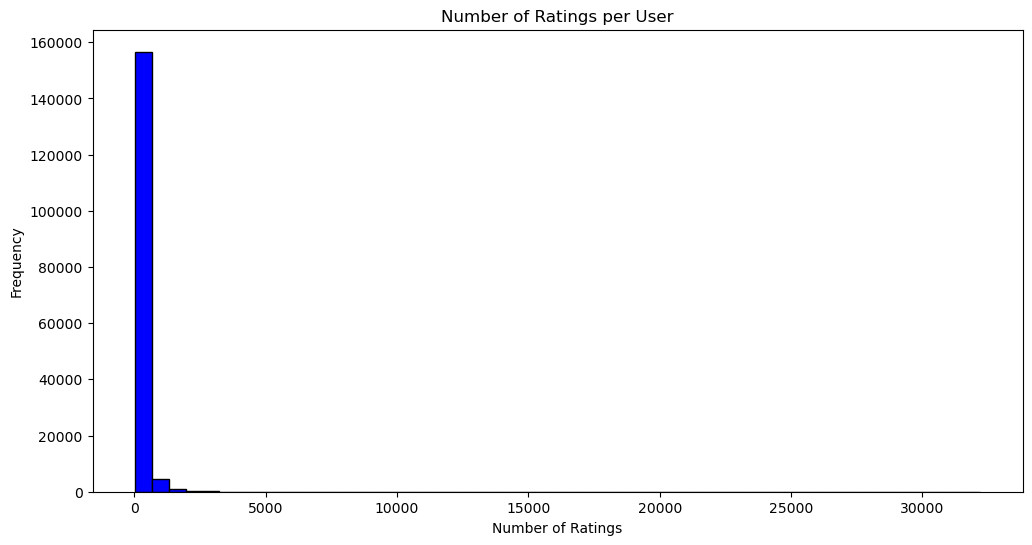

In [27]:
# Ratings per user
ratings_by_user = ratings.groupby('userId').size()

# Summary stats of ratings per user
print("Summary stats of ratings per user:", ratings_by_user.describe(percentiles=[0.5]))

# Value counts of ratings per user
print(ratings_by_user.value_counts().head(10))

plt.figure(figsize=(12, 6))
plt.hist(ratings_by_user, bins=50, color='blue', edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

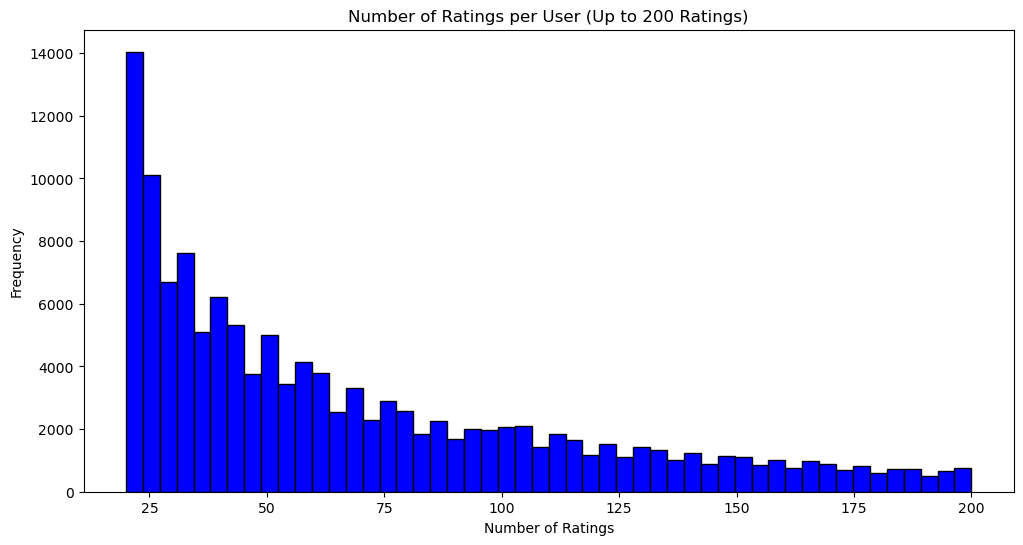

In [28]:
# Filter to users with up to 200 ratings
filtered_ratings_by_user = ratings_by_user[ratings_by_user <= 200]

# Plot
plt.figure(figsize=(12, 6))
plt.hist(filtered_ratings_by_user, bins=50, color='blue', edgecolor='black')
plt.title('Number of Ratings per User (Up to 200 Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


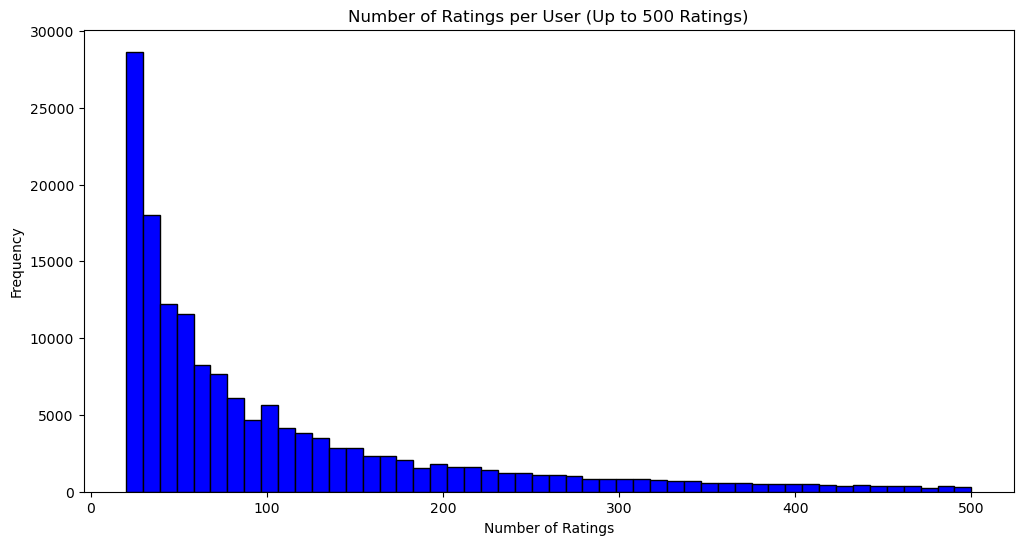

In [29]:
# Filter to users with up to 500 ratings
filtered_ratings_by_user = ratings_by_user[ratings_by_user <= 500]

# Plot
plt.figure(figsize=(12, 6))
plt.hist(filtered_ratings_by_user, bins=50, color='blue', edgecolor='black')
plt.title('Number of Ratings per User (Up to 500 Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


In [20]:
# How many users are there?
print("Number of users:", ratings_by_user.shape[0])

# How many users with more than X ratings?

# Define thresholds
thresholds = [5000, 1000, 500, 200, 100]

total_users = ratings_by_user.shape[0]

for threshold in thresholds:
    count = (ratings_by_user > threshold).sum()
    percentage = (count / total_users) * 100
    print(f"Number of users with more than {threshold} ratings: {count} ({percentage:.2f}%)")


Number of users: 162541
Number of users with more than 5000 ratings: 18 (0.01%)
Number of users with more than 1000 ratings: 2670 (1.64%)
Number of users with more than 500 ratings: 9663 (5.94%)
Number of users with more than 200 ratings: 32848 (20.21%)
Number of users with more than 100 ratings: 63102 (38.82%)


In [21]:
# Filter ratings > 4.0
high_ratings = ratings[ratings['rating'] >= 4.0]

# Group by userId and count ratings
ratings_by_user_high = high_ratings.groupby('userId').size()

# Total users in this filtered dataset
total_users_high = ratings_by_user_high.shape[0]

print("Number of users (with ratings >= 4.0):", total_users_high)

# Define thresholds
thresholds = [5000, 1000, 500, 200, 100]

# Loop through thresholds
for threshold in thresholds:
    count = (ratings_by_user_high > threshold).sum()
    percentage = (count / total_users_high) * 100
    print(f"Number of users with more than {threshold} high (4 or more) ratings: {count} ({percentage:.2f}%)")

Number of users (with ratings >= 4.0): 162342
Number of users with more than 5000 high (4 or more) ratings: 1 (0.00%)
Number of users with more than 1000 high (4 or more) ratings: 217 (0.13%)
Number of users with more than 500 high (4 or more) ratings: 1830 (1.13%)
Number of users with more than 200 high (4 or more) ratings: 13235 (8.15%)
Number of users with more than 100 high (4 or more) ratings: 35378 (21.79%)


In [ ]:
# Value counts of amount of genome scores per movie
print(genome_scores['movieId'].value_counts().head(10))
print(genome_scores['movieId'].value_counts().tail(10))

# All movies have a value for all genome tags

movieId
206499    1128
1         1128
2         1128
3         1128
4         1128
5         1128
6         1128
7         1128
203208    1128
202934    1128
Name: count, dtype: int64
movieId
18    1128
17    1128
16    1128
15    1128
14    1128
13    1128
12    1128
11    1128
10    1128
9     1128
Name: count, dtype: int64


In [35]:
ratings.head()

,userId,movieId,rating,timestamp,year,month,year_month,datetime
0,1,296,5.0,2006-05-17 15:34:04,2006,5,2006-05,2006-05-17 15:34:04
1,1,306,3.5,2006-05-17 12:26:57,2006,5,2006-05,2006-05-17 12:26:57
2,1,307,5.0,2006-05-17 12:27:08,2006,5,2006-05,2006-05-17 12:27:08
3,1,665,5.0,2006-05-17 15:13:40,2006,5,2006-05,2006-05-17 15:13:40
4,1,899,3.5,2006-05-17 12:21:50,2006,5,2006-05,2006-05-17 12:21:50


In [44]:
# Ratings per movie
ratings_by_movie = ratings.groupby('movieId').size()

# Summary stats of ratings per movie
print("Summary stats of ratings per movie:", ratings_by_movie.describe(percentiles=[0.5]))
print('\n')

# Define thresholds
thresholds = [5000, 1000, 500, 200, 100, 10, 5, 1]

total_movies = ratings_by_movie.shape[0]

for threshold in thresholds:
    count = (ratings_by_movie > threshold).sum()
    percentage = (count / total_movies) * 100
    print(f"Number of movies with more than {threshold} ratings: {count} ({percentage:.2f}%)")

Summary stats of ratings per movie: count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
50%          6.000000
max      81491.000000
dtype: float64


Number of movies with more than 5000 ratings: 1223 (2.07%)
Number of movies with more than 1000 ratings: 3790 (6.42%)
Number of movies with more than 500 ratings: 5380 (9.11%)
Number of movies with more than 200 ratings: 7969 (13.50%)
Number of movies with more than 100 ratings: 10291 (17.43%)
Number of movies with more than 10 ratings: 23357 (39.56%)
Number of movies with more than 5 ratings: 30207 (51.16%)
Number of movies with more than 1 ratings: 48749 (82.56%)


Summary stats of ratings per movie: count    40858.000000
mean       304.782686
std       1854.035918
min          1.000000
50%          4.000000
max      70514.000000
dtype: float64
1     11412
2      4945
3      2781
4      1783
5      1314
6      1072
7       858
8       693
9       572
10      535
Name: count, dtype: int64


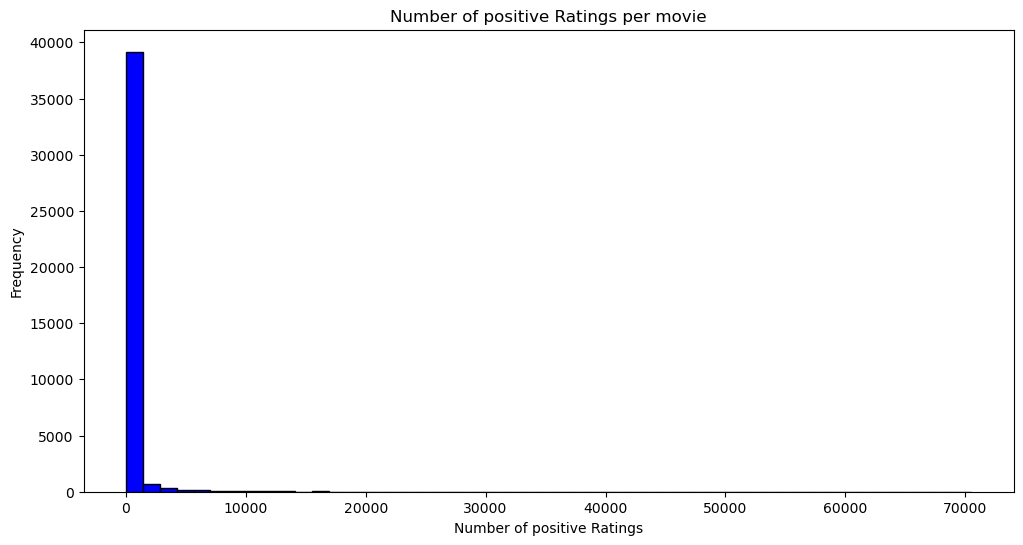

In [ ]:
# Positive Ratings per movie
positive_ratings_by_movie = ratings[ratings['rating']>=4].groupby('movieId').size()

# Summary stats of ratings per movie
print("Summary stats of positive ratings per movie:", positive_ratings_by_movie.describe(percentiles=[0.5]))

# Value counts of ratings per movie
print(positive_ratings_by_movie.value_counts().head(10))

plt.figure(figsize=(12, 6))
plt.hist(positive_ratings_by_movie, bins=50, color='blue', edgecolor='black')
plt.title('Number of positive Ratings per movie')
plt.xlabel('Number of positive Ratings')
plt.ylabel('Frequency')
plt.show()

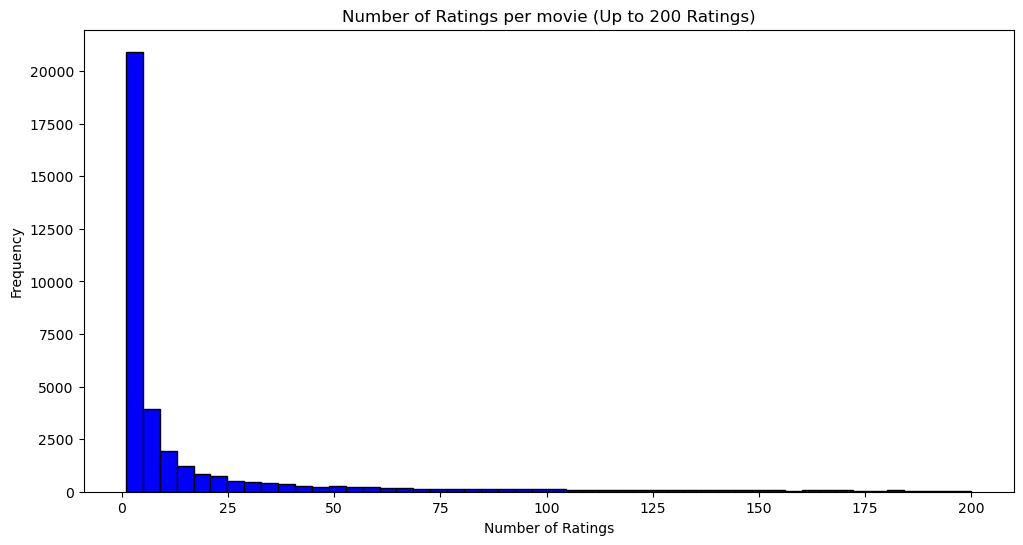

In [38]:
# Filter to movies with up to 200 ratings
filtered_ratings_by_movie = positive_ratings_by_movie[positive_ratings_by_movie <= 200]

# Plot
plt.figure(figsize=(12, 6))
plt.hist(filtered_ratings_by_movie, bins=50, color='blue', edgecolor='black')
plt.title('Number of Ratings per movie (Up to 200 Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# How many movies are there?
print("Number of movies:", positive_ratings_by_movie.shape[0])

# How many movies with more than X ratings?

# Define thresholds
thresholds = [5000, 1000, 500, 200, 100, 10, 5, 1]

total_movies = positive_ratings_by_movie.shape[0]

for threshold in thresholds:
    count = (positive_ratings_by_movie > threshold).sum()
    percentage = (count / total_movies) * 100
    print(f"Number of movies with more than {threshold} positive ratings: {count} ({percentage:.2f}%)")

Number of movies: 40858
Number of movies with more than 5000 positive ratings: 563 (1.38%)
Number of movies with more than 1000 positive ratings: 2107 (5.16%)
Number of movies with more than 500 positive ratings: 3203 (7.84%)
Number of movies with more than 200 positive ratings: 5028 (12.31%)
Number of movies with more than 100 positive ratings: 6814 (16.68%)
Number of movies with more than 10 positive ratings: 14893 (36.45%)
Number of movies with more than 5 positive ratings: 18623 (45.58%)
Number of movies with more than 1 positive ratings: 29446 (72.07%)


In [ ]:
# Filter ratings > 4.0
high_ratings = ratings[ratings['rating'] >= 4.0]

# Group by userId and count ratings
ratings_by_user_high = high_ratings.groupby('userId').size()

# Total users in this filtered dataset
total_users_high = ratings_by_user_high.shape[0]

print("Number of users (with ratings >= 4.0):", total_users_high)

# Define thresholds
thresholds = [5000, 1000, 500, 200, 100]

# Loop through thresholds
for threshold in thresholds:
    count = (ratings_by_user_high > threshold).sum()
    percentage = (count / total_users_high) * 100
    print(f"Number of users with more than {threshold} high (4 or more) ratings: {count} ({percentage:.2f}%)")

## Processing (testing stuff)

In [22]:
# Keep only ratings with at least 4.0 rating
old_rows = ratings.shape[0]
ratings2 = ratings[ratings['rating'] >= 4.0]
new_rows = ratings2.shape[0]
print("Number of ratings before filtering:", old_rows)
print("Number of ratings after filtering:", new_rows)
print("Percentage of ratings kept:", round(new_rows / old_rows * 100, 2), "%")

Number of ratings before filtering: 25000095
Number of ratings after filtering: 12452811
Percentage of ratings kept: 49.81 %


In [ ]:
# Keep only movies with genome scores
movie_ids_with_genome_scores = genome_scores['movieId'].unique()

# Edit movies dataframe to only include movies with genome scores
old_rows = movies.shape[0]
movies2 = movies[movies['movieId'].isin(movie_ids_with_genome_scores)]
new_rows = movies2.shape[0]
print("The original movies dataframe had", old_rows, "rows.")
print(f"Removed {old_rows - new_rows} movies from the dataset that do not have genome scores.")
print("The new movies dataframe has these rows:", movies2.shape[0])
print("\n")

# Repeat with ratings dataframe
old_rows = ratings2.shape[0]
ratings3 = ratings2[ratings2['movieId'].isin(movie_ids_with_genome_scores)]
new_rows = ratings3.shape[0]
print("The original ratings dataframe had", old_rows, "rows.")
print(f"Removed {old_rows - new_rows} ratings from the dataset that do not have genome scores.")
print("The new ratings dataframe has these rows:", ratings3.shape[0])
print("\n")

# How many unique users are left?
print("The new ratings dataframe has", ratings3['userId'].nunique(), "unique users.")

The original movies dataframe had 62423 rows.
Removed 48607 movies from the dataset that do not have genome scores.
The new movies dataframe has these rows: 13816


The original ratings dataframe had 12452811 rows.
Removed 94053 ratings from the dataset that do not have genome scores.
The new ratings dataframe has these rows: 12358758
The new ratings dataframe has 162341 unique users.
